In [947]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas



In [948]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [949]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [950]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# by scaling the data and centering it around the mean.

# Initialize the `StandardScaler()`
scaler = StandardScaler()            

In [951]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)

# Copy the crypto names from the original data
scaled_data = scaler.fit_transform(market_data_df)

# Set the coinid column as index
scaled_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Display sample data
scaled_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [952]:
# Find the best value for k using the Original Scaled DataFrame
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init=10, random_state=1)
    k_model.fit(scaled_data_df)
    inertia.append(k_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, 'inertia': inertia} 
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data) 
# Display the DataFrame
elbow_df.head(10)


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,53.057788
6,7,44.406791
7,8,37.078233
8,9,32.832187
9,10,28.165433


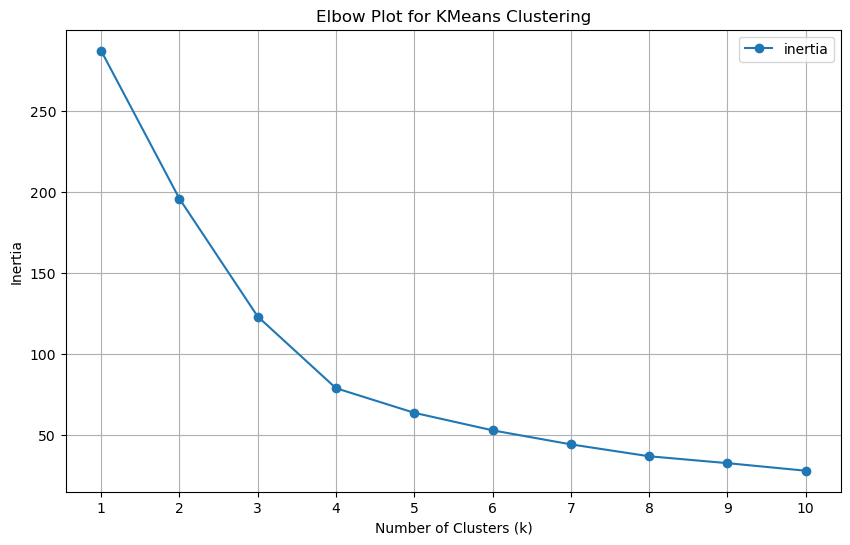

In [953]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Use the DataFrame plot method
# df.plot(x='k', y='inertia', kind='line')

elbow_df.plot(x='k', y='inertia', kind='line', marker='o', figsize=(10, 6))

plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** It appears that the curve starts to flatten out after k = 4, as the decrease in inertia from k = 4 to k= 5 and beyond is less steep Therefore, based on this chart, a good candidate for the optimal number of clusters could be k = 4


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [954]:
# Cluster Cryptocurrencies with K-means Using the Original Scaled Data.
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=1)


In [955]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=4, n_init=10, random_state=1)

In [956]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_data_df)

# View the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [957]:
# Create a copy of the DataFrame
clustered_df = scaled_data_df.copy()

In [958]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["crypto_cluster"] = kmeans.labels_
# Display sample data
clustered_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [959]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="crypto_cluster", 
                            colormap="rainbow", figsize=(10, 6), colorbar=True, 
                            title="Crypto Clusters by Price Change")




:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,crypto_cluster)

### Optimize Clusters with Principal Component Analysis.

In [960]:
# Optimize Clusters with Principal Component Analysis
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)


In [961]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_data)
            
# View the first five rows of the DataFrame. 

pca_data_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=market_data_df.index)
print(pca_data_df.head(5))

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [962]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
            


[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 89.50%. This means that these three principal components together capture about 89.50% of the total variance in the original scaled dataset, providing a substantial summary of the data with reduced dimensionality. ​

In [963]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df_new = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])


# Copy the crypto names from the original data
pca_df_new['coin_id'] = market_data_df.index.tolist()

# Set the coinid column as index
pca_df_new.set_index('coin_id', inplace=True)

# Display sample data
pca_df_new.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [964]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))


# Create an empty list to store the inertia values
inertia= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init=10, random_state=2)
    k_model.fit(pca_data)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)    

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.194032
7,8,17.016962
8,9,13.681140
9,10,10.836312


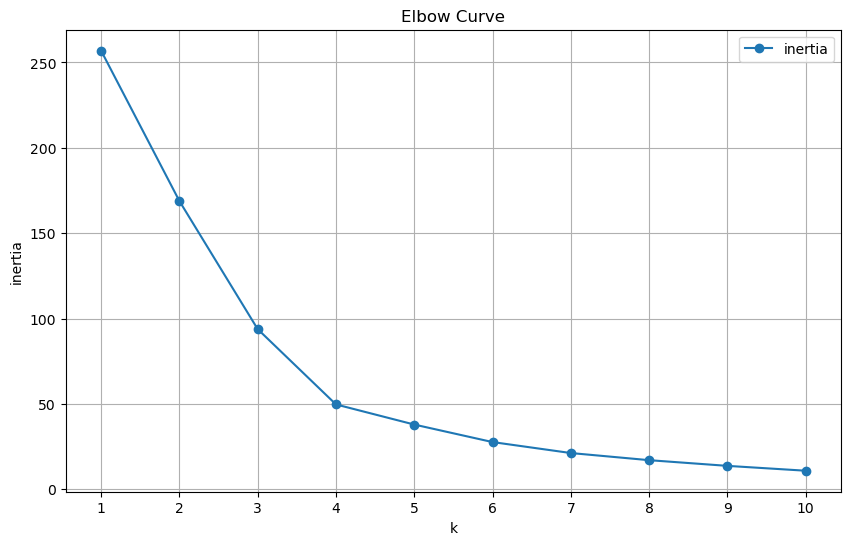

In [965]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Use the DataFrame plot method
# df.plot(x='k', y='inertia', kind='line')
elbow_df.plot(x='k', y='inertia', kind='line', marker='o', figsize=(10, 6))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Curve')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data appears to be 4, as indicated by the Elbow Curve.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Based on the provided graphs, which seem identical, the best k value does not differ when using the PCA data compared to the original data. It remains at 4 in both cases.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [966]:
# Initialize the K-Means model using the best value for k
best_k = 4

In [967]:
# Fit the K-Means model using the PCA data
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=1)
kmeans.fit(pca_df_new)

KMeans(n_clusters=4, n_init=10, random_state=1)

In [968]:
# Predict the clusters to group the cryptocurrencies using the PCA data

cluster_labels = kmeans.labels_


# Print the resulting array of cluster values.
print(cluster_labels)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [969]:

# Create a copy of the DataFrame with the PCA data
pca_df = pca_df_new.copy()
# Add a new column to the DataFrame with the predicted clusters
pca_df["crypto_cluster"] = kmeans.labels_
# Display sample data
pca_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [970]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
pca_df.hvplot.scatter(x="PCA1", y="PCA2", 
                            c="crypto_cluster", colormap="rainbow", figsize=(10, 6), colorbar=True, 
                            title="Crypto Clusters by PCA Components")

    



:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component


In [971]:

# Use the columns from the original scaled DataFrame as the index.
feature_weights_df = pd.DataFrame(pca.components_, columns=scaled_data_df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
# Display sample data
display(feature_weights_df)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PC1: price_change_percentage_200d (positive influence, weight: 0.594)
PC2: price_change_percentage_30d (positive influence, weight: 0.562)
PC3: price_change_percentage_7d (positive influence, weight: 0.788)

In [972]:
# Assuming feature_weights_df is the DataFrame created from pca.components_
# with columns named after the original features and indexed by components (PC1, PC2, ...)

# Identify the features with the strongest positive or negative influence on each component
strongest_features = feature_weights_df.abs().idxmax(axis=1)

# Display the features with the strongest influence for each component
for component, feature in strongest_features.items():
    value = feature_weights_df.loc[component, feature]
    print(f"{component}: {feature} ({'positive' if value > 0 else 'negative'} influence, weight: {value:.3f})")
    
    

PC1: price_change_percentage_200d (positive influence, weight: 0.594)
PC2: price_change_percentage_30d (positive influence, weight: 0.562)
PC3: price_change_percentage_7d (positive influence, weight: 0.788)
